# กฎของเกาส์ (Gauss' Law)

## สนามไฟฟ้าเนื่องจากประจุรูปวงกลม

### การใช้ฟังก์ชันพาราเมตริก (Parametric Function) สำหรับสร้างประจุรูปวงกลม
$$\mathbf{r'}=
\begin{bmatrix}
l\cos(t)\\
l\sin(t)
\end{bmatrix},\quad 0<t<2\pi$$
เมื่อ $l$ คือ รัศมีของวงกลม

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid', 'notebook'])

Text(0, 0.5, 'y')

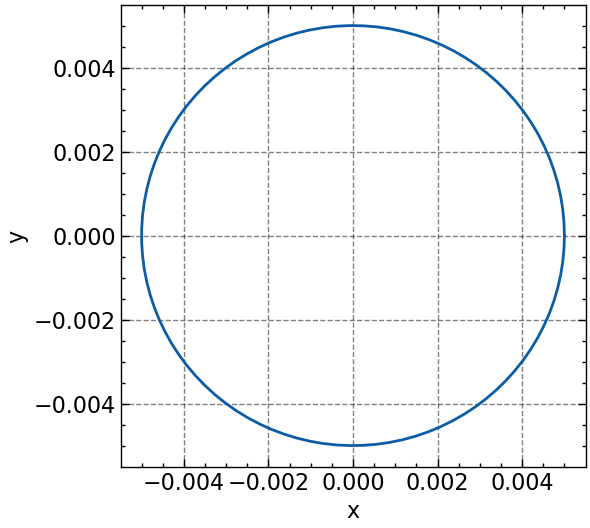

In [12]:
# plot ประจุรูปวงกลมโดยใช้ parameter t
t = np.linspace(0, 2.0 * np.pi, 100)
l = 0.5e-2 # รัศมี 0.5 cm
x = l * np.cos(t)
y = l * np.sin(t)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

## สนามไฟฟ้าจากประจุรูปแบบใด ๆ
$$\mathbf{dE}=\frac{dq}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$
$$\mathbf{E(r)}=\int\mathbf{dE}$$

Line Charge Definition
$$dq=\rho_l(r')d\mathbf{r'}$$

Parameterised
$$dq=\rho_l(r')\left\|\frac{d\mathbf{r'}}{dt}\right\|dt$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

หาสนามไฟฟ้าเนื่องจากประจุแบบวงกลม รัศมี $2.5~cm$ ที่มีประจุรวม $Q=1~\mu C$ 

In [2]:
# ความหนาแน่นประจุ
Q = 1e-6
radius = 2.5e-2
rho_l = Q / (2.0 * pi * radius)
rho_l

6.366197723675813e-06

In [3]:
x, y, t = smp.symbols('x y t')
r = smp.Matrix([x, y])
rp = smp.Matrix([radius * smp.cos(t), radius * smp.sin(t)])
R = r - rp
R

Matrix([
[x - 0.025*cos(t)],
[y - 0.025*sin(t)]])

In [4]:
dqdt = rho_l * smp.diff(rp, t).norm()
dqdt

1.59154943091895e-7*sqrt(Abs(sin(t))**2 + Abs(cos(t))**2)

ทดลองอินทิเกรตเพื่อหาประจุรวม $\int_0^{2\pi}\frac{dq}{dt}\,dt$

In [5]:
smp.integrate(dqdt, [t, 0, 2.0 * np.pi])

1.00000000000000e-6

In [6]:
# หา dEdt
dEdt = dqdt / (4.0 * pi * epsilon_0) * R / R.norm()**3
dEdt

Matrix([
[1430.41329403279*(x - 0.025*cos(t))*sqrt(Abs(sin(t))**2 + Abs(cos(t))**2)/(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)**(3/2)],
[1430.41329403279*(y - 0.025*sin(t))*sqrt(Abs(sin(t))**2 + Abs(cos(t))**2)/(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)**(3/2)]])

In [7]:
# Integrate
smp.integrate(dEdt, [t, 0, 2.0 * np.pi])

Matrix([
[1430.41329403279*Integral(1.0*x*sqrt(sin(t)**2 + cos(t)**2)/(sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(x - 0.025*cos(t))**2 + sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(y - 0.025*sin(t))**2), (t, 0, 6.28318530717959)) + 1430.41329403279*Integral(-0.025*sqrt(sin(t)**2 + cos(t)**2)*cos(t)/(sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(x - 0.025*cos(t))**2 + sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(y - 0.025*sin(t))**2), (t, 0, 6.28318530717959))],
[1430.41329403279*Integral(1.0*y*sqrt(sin(t)**2 + cos(t)**2)/(sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(x - 0.025*cos(t))**2 + sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(y - 0.025*sin(t))**2), (t, 0, 6.28318530717959)) + 1430.41329403279*Integral(-0.025*sqrt(sin(t)**2 + cos(t)**2)*sin(t)/(sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(x - 0.025*cos(t))**2 + sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(

Symbolic Integration หาคำตอบไม่ได้ ดังนั้น ควรใช้ Numerical Integration

In [7]:
dExdt = smp.lambdify([t, x, y], dEdt[0])
dEydt = smp.lambdify([t, x, y], dEdt[1])

In [8]:
def E(x, y):
    Ex = quad(dExdt, 0, 2.0 * np.pi, args=(x, y))[0]
    Ey = quad(dEydt, 0, 2.0 * np.pi, args=(x, y))[0]
    return np.array([Ex, Ey])

In [9]:
E(1, 2)

array([ 803.9464421 , 1607.89288419])

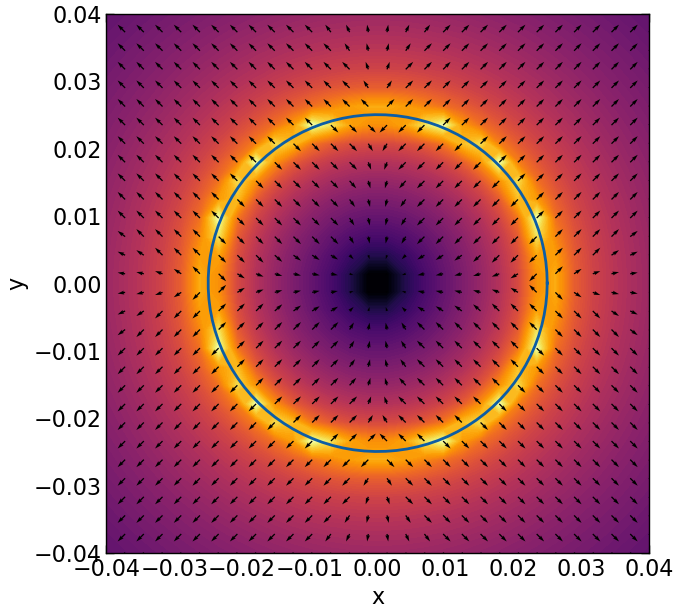

In [12]:
# Plot field
fig = plt.figure(figsize=(7, 7))
ax = field_plot(E, x_min=-4e-2, x_max=4e-2, y_min=-4e-2, y_max=4e-2, num_grids=30, contour=True, cmap='inferno')

# Plot the charge
t = np.linspace(0, 2.0 * np.pi, 100)
l = 2.5e-2 
x = l * np.cos(t)
y = l * np.sin(t)
plt.plot(x, y)
plt.show()

สนามไฟฟ้าเนื่องจากประจุรูปวงกลมศูนย์กลางร่วมที่มีรัศมี $5~cm$ และ $4~cm$ ตามลำดับ โดยที่ประจุตัวในมีขนาด $1~\mu C$ และประจุตัวนอกมีขนาด $-1~\mu C$

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

In [55]:
# ประจุตัวใน
Q1 = 1e-6
radius1 = 3e-2
rho_l1 = Q1 / (2.0 * pi * radius1)
# ประจุตัวนอก
Q2 = -1e-6
radius2 = 5e-2
rho_l2 = Q2 / (2.0 * pi * radius2)

In [56]:
x, y, t = smp.symbols('x y t', real=True)
r = smp.Matrix([x, y])
rp1 = smp.Matrix([radius1 * smp.cos(t), radius1 * smp.sin(t)])
R1 = r - rp1

rp2 = smp.Matrix([radius2 * smp.cos(t), radius2 * smp.sin(t)])
R2 = r - rp2

In [57]:
dq1dt = rho_l1 * smp.diff(rp1, t).norm()
dq2dt = rho_l2 * smp.diff(rp2, t).norm()

In [58]:
# หา dEdt
dE1dt = dq1dt / (4.0 * pi * epsilon_0) * R1 / R1.norm()**3
dE2dt = dq2dt / (4.0 * pi * epsilon_0) * R2 / R2.norm()**3
dEdt = dE1dt + dE2dt
dEdt

Matrix([
[-1430.41329403279*(x - 0.05*cos(t))*sqrt(sin(t)**2 + cos(t)**2)/((x - 0.05*cos(t))**2 + (y - 0.05*sin(t))**2)**(3/2) + 1430.41329403279*(x - 0.03*cos(t))*sqrt(sin(t)**2 + cos(t)**2)/((x - 0.03*cos(t))**2 + (y - 0.03*sin(t))**2)**(3/2)],
[-1430.41329403279*(y - 0.05*sin(t))*sqrt(sin(t)**2 + cos(t)**2)/((x - 0.05*cos(t))**2 + (y - 0.05*sin(t))**2)**(3/2) + 1430.41329403279*(y - 0.03*sin(t))*sqrt(sin(t)**2 + cos(t)**2)/((x - 0.03*cos(t))**2 + (y - 0.03*sin(t))**2)**(3/2)]])

In [59]:
dExdt = smp.lambdify([t, x, y], dEdt[0])
dEydt = smp.lambdify([t, x, y], dEdt[1])

def E(x, y):
    Ex = quad(dExdt, 0, 2.0 * pi, args=(x, y))[0]
    Ey = quad(dEydt, 0, 2.0 * pi, args=(x, y))[0]
    return np.array([Ex, Ey])

In [60]:
E(1, 2)

array([-0.19305211, -0.38610423])

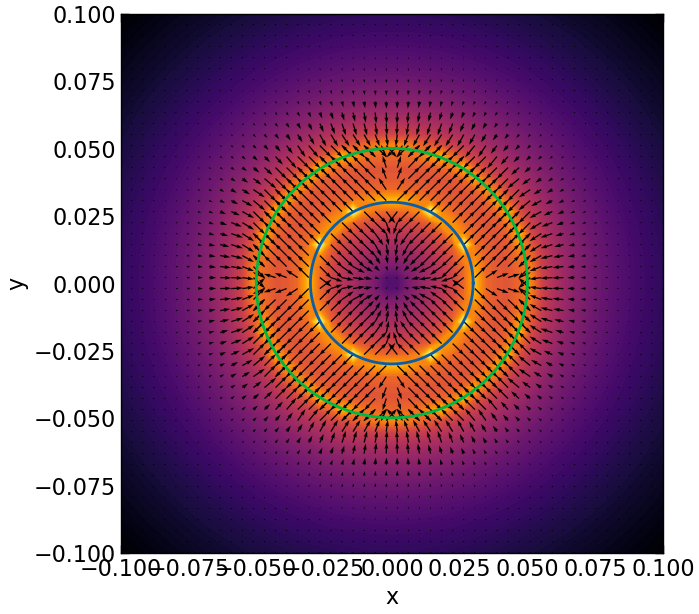

In [61]:
# Plot
# Plot field
fig = plt.figure(figsize=(7, 7))
ax = field_plot(E, x_min=-10e-2, x_max=10e-2, y_min=-10e-2, y_max=10e-2, num_grids=50, contour=True, cmap='inferno')

# Plot the charge
t = np.linspace(0, 2.0 * np.pi, 100)
l1 = radius1
l2 = radius2
x1 = l1 * np.cos(t)
y1 = l1 * np.sin(t)
x2 = l2 * np.cos(t)
y2 = l2 * np.sin(t)
plt.plot(x1, y1, x2, y2)
plt.show()

### กฎของเกาส์ (Gauss's Law)

$$\oint\mathbf{D}\cdot\mathbf{ds}=Q_{encl}$$

สำหรับระบบพิกัดทรงกระบอก (Cylindrical Coordinate System)
$$\mathbf{D}=D_\rho\mathbf{a_\rho}+D_\phi\mathbf{a_\phi}+D_z\mathbf{a_z}$$
และ
$$\mathbf{ds}=d\rho\mathbf{a_\rho}+\rho d\phi\mathbf{a_\phi}+dz\mathbf{a_z}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

In [2]:
r, theta, phi = smp.symbols('r theta phi', pos=True, real=True)

rp = smp.Matrix([r * smp.sin(theta) * smp.cos(phi),
               r * smp.sin(theta) * smp.sin(phi),
               r * smp.cos(theta)])
rp

Matrix([
[r*sin(theta)*cos(phi)],
[r*sin(phi)*sin(theta)],
[         r*cos(theta)]])

In [5]:
dr_diff = smp.diff(rp, theta).cross(smp.diff(rp, phi))
dr_diff.norm().simplify()

r**2*Abs(sin(theta))

In [6]:
smp.integrate(dr_diff.norm(), (theta, 0, smp.pi), (phi, 0, 2 * smp.pi)).doit()

4*pi*r**2

In [9]:
smp.integrate(r**2 * smp.sin(theta), (theta, 0, smp.pi), (phi, 0, 2 * smp.pi))

4*pi*r**2

In [1]:
# ระบบพิกัดทรงกระบอก
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

In [9]:
rho, phi, z, L = smp.symbols('rho, phi, z, L', real=True)

rg = smp.Matrix([rho * smp.cos(phi),
                rho * smp.sin(phi),
                z])
rg

Matrix([
[rho*cos(phi)],
[rho*sin(phi)],
[           z]])

In [10]:
rg_diff = smp.diff(rg, phi).cross(smp.diff(rg, z)).norm()
rg_diff.simplify()

Abs(rho)

In [13]:
smp.integrate(rg_diff, (phi, 0, 2 * smp.pi), (z, -L/2, L/2)).simplify()

Piecewise((2*pi*L*rho, rho >= 0), (-2*pi*L*rho, True))

In [24]:
R = rg.subs(rho, 1)
R

Matrix([
[cos(phi)],
[sin(phi)],
[       z]])

In [41]:
t = np.linspace(0, 2 * np.pi, 100)
z = np.linspace(-1, 1, 100)

T, Z = np.meshgrid(t, z)

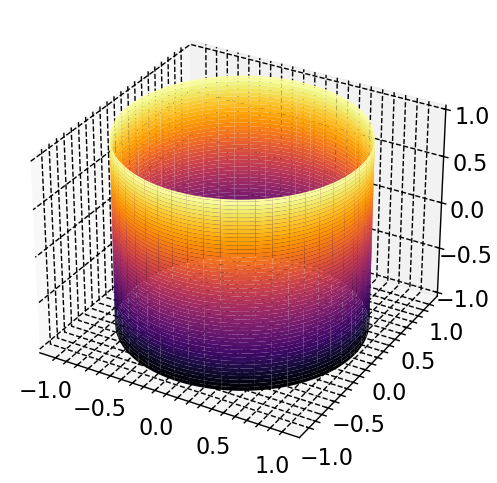

In [44]:
ax = plt.axes(projection='3d')
ax.plot_surface(np.cos(T), np.sin(T), Z, cmap='inferno')

สำหรับประจุแบบท่อตัวนำแกนร่วม (Coaxcial Charge) ที่มีประจุด้านในและนอกเป็น $Q$ และ $-Q$ ตามลำดับ และมีรัศมี ณ ตำแหน่งต่าง ๆ เป็น $\rho_1, \rho_2$ และ $\rho_3$
